## This script will create pdfs of both model output and TRMM data for certain gridpoints

In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import xarray as xr
import numpy as np
import pandas as pd
import glob
import re
from scipy.stats.kde import gaussian_kde
from numpy import linspace
import cartopy.crs as ccrs
import matplotlib

In [74]:
trmm14=xr.open_dataset('../parameterization_exp/trmm_2014_JunAug.nc')
trmm15=xr.open_dataset('../parameterization_exp/trmm_2015_JunAug.nc')
ti,la,lo=np.shape(trmm14.PPT)
trmm=np.zeros([184,la,lo])
trmm[:92,:,:]=trmm14.PPT
trmm[92:,:,:]=trmm15.PPT
trmmc=np.zeros([62,la,lo])
trmmc[:31,:,:]=trmm14.PPT[30:61]
trmmc[31:,:,:]=trmm15.PPT[30:61]

In [3]:
chiangsaen_loc={'lat':20.27416667,'lon':100.09083333}
mukdahan_loc={'lat':16.54000000,'lon':104.73666667}
kratie_loc={'lat':12.47666667,'lon':106.01500000}
print(chiangsaen_loc['lat'])

20.27416667


In [4]:
def pos(loc,frame):
    for i,val in enumerate(frame.lat.data):
        if loc['lat']<val:
            ilat=i-1
            break
    for j,val in enumerate(frame.lon.data):
        if loc['lon']<val:
            ilon=j-1
            break
    return ilat,ilon

In [5]:
def plotpdf(loc,data,frame,title):
    ilat,ilon=pos(loc,frame)
    ilattrmm,ilontrmm=pos(loc,trmm14)
    valtrmm=pd.DataFrame(trmm[:,ilattrmm,ilontrmm],columns=(['trmm']))
    val=pd.DataFrame(data[:,ilat,ilon],columns=['model'])
    ax=val.plot.density(color='blue')
    valtrmm.plot.density(ax=ax,color='black')
    ax.set_xbound(lower=0,upper=100)
    ax.set_title(title)
#     val.plot.hist(ax=ax.twinx())
#     n, bins, patches = plt.hist(val, 50, normed=1, facecolor='green', alpha=0.75)
    # add a 'best fit' line
#     print(np.isinf(val).any())
#     ax=plt.subplot()
#     ax=val.plot.density()
#     print(~ (np.isfinite(val).all()))
#     print(np.isfinite(val))
#     print(np.asarray(val))
#     val.as_matrix().toarray()
#     kde = [gaussian_kde(np.asarray(val),bw_method=0.1)]
#     # these are the values over wich your kernel will be evaluated
#     dist_space = linspace( min(val), max(val), 100 )
#     # plot the results
#     plt.plot( dist_space, kde(dist_space) )
#     ax1=val.plot.hist(ylim=[0,200],xlim=[0.01,80],bins=20)
#     ax1.set_title(title)



## Plot PDF and histogram of precipitation from TRMM output using selected locations

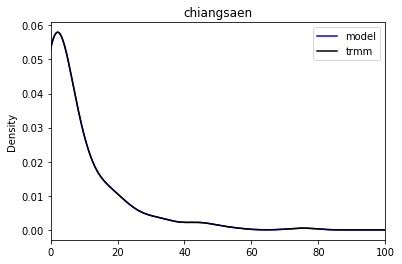

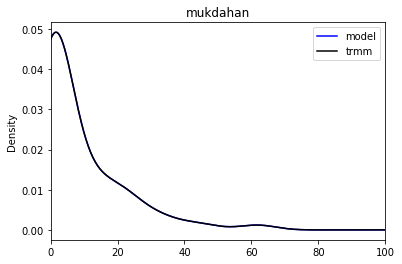

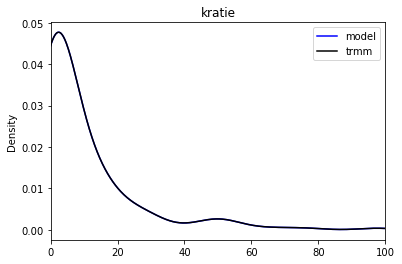

In [6]:
plotpdf(chiangsaen_loc,trmm,trmm14,'chiangsaen')
plotpdf(mukdahan_loc,trmm,trmm14,'mukdahan')
plotpdf(kratie_loc,trmm,trmm14,'kratie')
plt.show()

## Plot histograms and PDF for all WRF experiment outputs

In [7]:
#get list of files
file_list2014=[]
file_list2015=[]
for name in glob.glob('../parameterization_exp/wrfpost_run*_2014_d01.nc'):
    file_list2014.append(name)
for name in glob.glob('../parameterization_exp/wrfpost_run*_2015_d01.nc'):
    file_list2015.append(name)

#rearrange files by number
print('rearranging files')
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

file_list2014.sort(key=natural_keys)
file_list2015.sort(key=natural_keys)

rearranging files


working on../parameterization_exp/wrfpost_run_14_2014_d01.nc ../parameterization_exp/wrfpost_run_01_2015_d01.nc
domain mean 9.58651756647


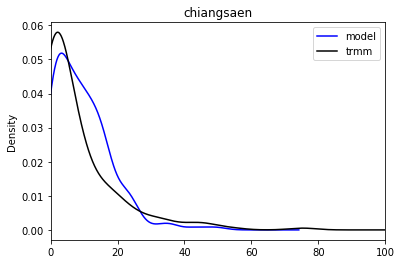

working on../parameterization_exp/wrfpost_run_15_2014_d01.nc ../parameterization_exp/wrfpost_run_02_2015_d01.nc
domain mean 8.36413849509


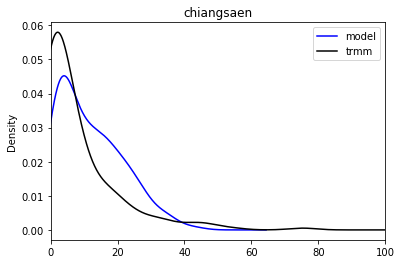

working on../parameterization_exp/wrfpost_run_16_2014_d01.nc ../parameterization_exp/wrfpost_run_03_2015_d01.nc
domain mean 8.40596660126


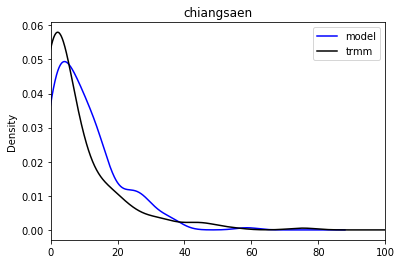

working on../parameterization_exp/wrfpost_run_17_2014_d01.nc ../parameterization_exp/wrfpost_run_04_2015_d01.nc
domain mean 9.32611695085


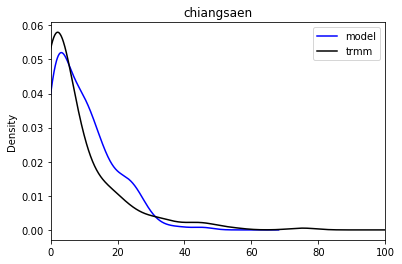

working on../parameterization_exp/wrfpost_run_18_2014_d01.nc ../parameterization_exp/wrfpost_run_05_2015_d01.nc
domain mean 8.86255904203


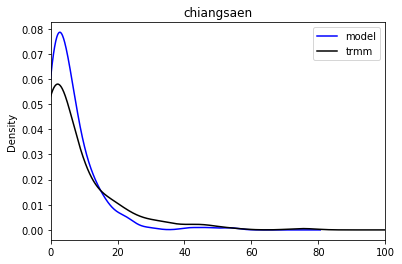

working on../parameterization_exp/wrfpost_run_19_2014_d01.nc ../parameterization_exp/wrfpost_run_06_2015_d01.nc
domain mean 8.02543138096


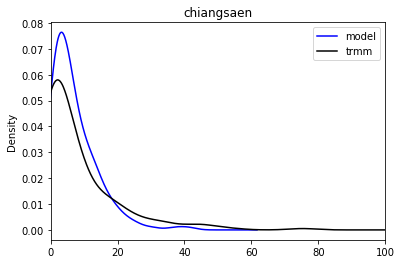

working on../parameterization_exp/wrfpost_run_20_2014_d01.nc ../parameterization_exp/wrfpost_run_07_2015_d01.nc
domain mean 7.95634688757


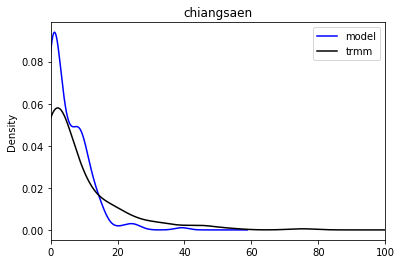

working on../parameterization_exp/wrfpost_run_21_2014_d01.nc ../parameterization_exp/wrfpost_run_08_2015_d01.nc
domain mean 7.89560198332


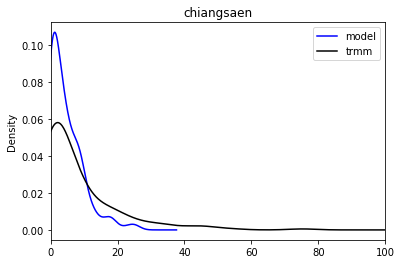

working on../parameterization_exp/wrfpost_run_22_2014_d01.nc ../parameterization_exp/wrfpost_run_09_2015_d01.nc
domain mean 12.9978292812


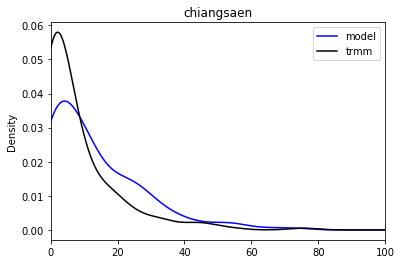

working on../parameterization_exp/wrfpost_run_23_2014_d01.nc ../parameterization_exp/wrfpost_run_10_2015_d01.nc
domain mean 11.3757088915


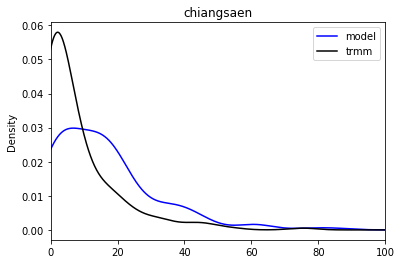

working on../parameterization_exp/wrfpost_run_24_2014_d01.nc ../parameterization_exp/wrfpost_run_11_2015_d01.nc
domain mean 11.4767636043


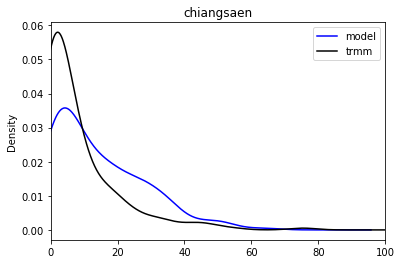

working on../parameterization_exp/wrfpost_run_25_2014_d01.nc ../parameterization_exp/wrfpost_run_12_2015_d01.nc
domain mean 12.3744343804


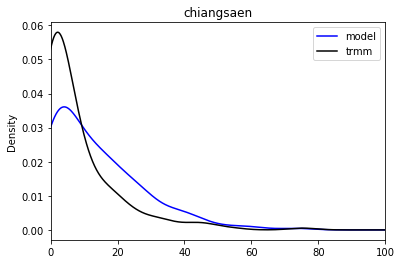

working on../parameterization_exp/wrfpost_run_26_2014_d01.nc ../parameterization_exp/wrfpost_run_13_2015_d01.nc
domain mean 8.36446101691


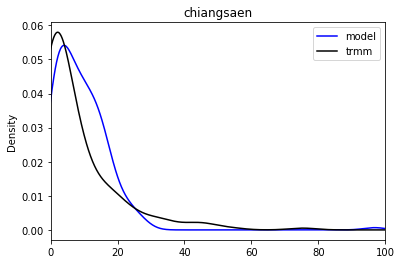

working on../parameterization_exp/wrfpost_run_28_2014_d01.nc ../parameterization_exp/wrfpost_run_27_2015_d01.nc
domain mean 7.64152928991


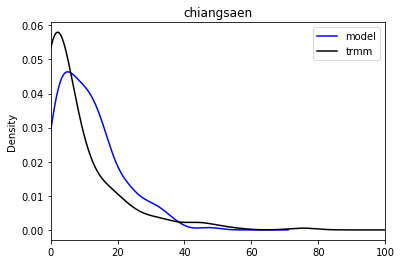

In [8]:
#combine files
for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([184,la,lo])
    ppt[:92,:,:]=wrf2014.PPT
    ppt[92:,:,:]=wrf2015.PPT
    print('domain mean',np.mean(ppt))
    plotpdf(chiangsaen_loc,ppt,wrf2014,'chiangsaen')
    
    plt.show()

working on../parameterization_exp/wrfpost_run_14_2014_d01.nc ../parameterization_exp/wrfpost_run_01_2015_d01.nc


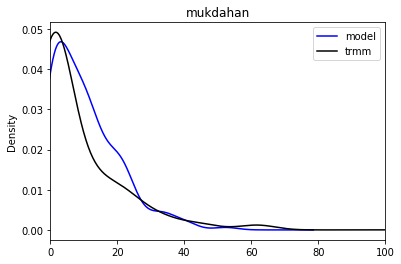

working on../parameterization_exp/wrfpost_run_15_2014_d01.nc ../parameterization_exp/wrfpost_run_02_2015_d01.nc


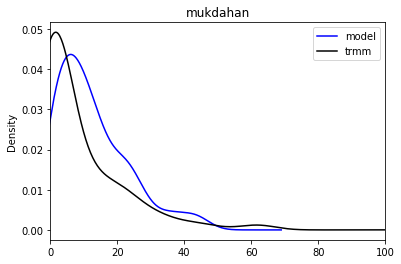

working on../parameterization_exp/wrfpost_run_16_2014_d01.nc ../parameterization_exp/wrfpost_run_03_2015_d01.nc


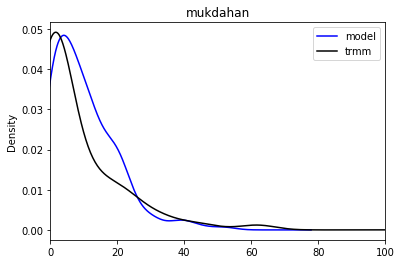

working on../parameterization_exp/wrfpost_run_17_2014_d01.nc ../parameterization_exp/wrfpost_run_04_2015_d01.nc


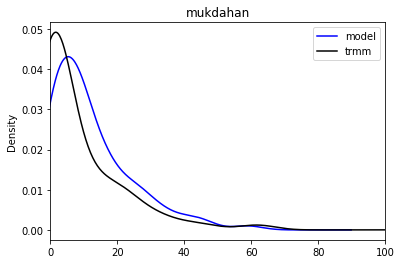

working on../parameterization_exp/wrfpost_run_18_2014_d01.nc ../parameterization_exp/wrfpost_run_05_2015_d01.nc


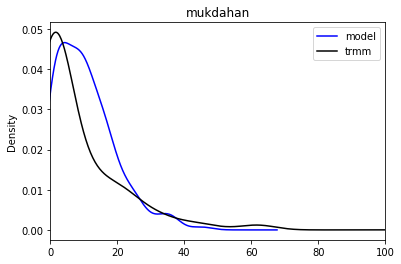

working on../parameterization_exp/wrfpost_run_19_2014_d01.nc ../parameterization_exp/wrfpost_run_06_2015_d01.nc


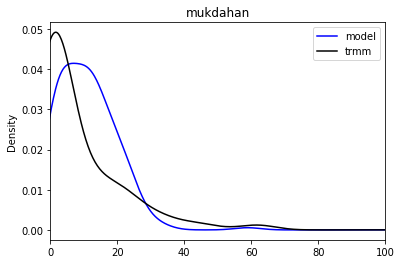

working on../parameterization_exp/wrfpost_run_20_2014_d01.nc ../parameterization_exp/wrfpost_run_07_2015_d01.nc


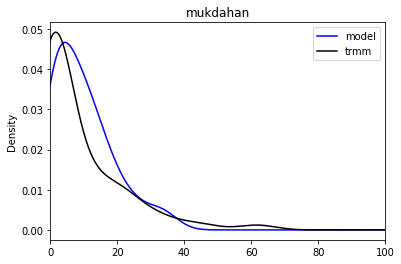

working on../parameterization_exp/wrfpost_run_21_2014_d01.nc ../parameterization_exp/wrfpost_run_08_2015_d01.nc


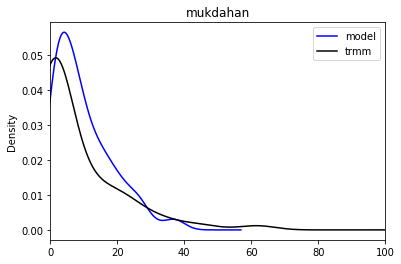

working on../parameterization_exp/wrfpost_run_22_2014_d01.nc ../parameterization_exp/wrfpost_run_09_2015_d01.nc


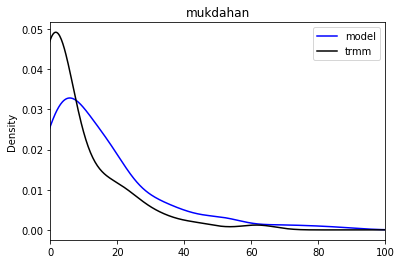

working on../parameterization_exp/wrfpost_run_23_2014_d01.nc ../parameterization_exp/wrfpost_run_10_2015_d01.nc


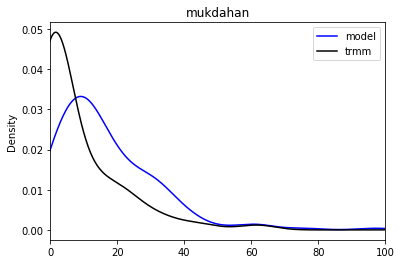

working on../parameterization_exp/wrfpost_run_24_2014_d01.nc ../parameterization_exp/wrfpost_run_11_2015_d01.nc


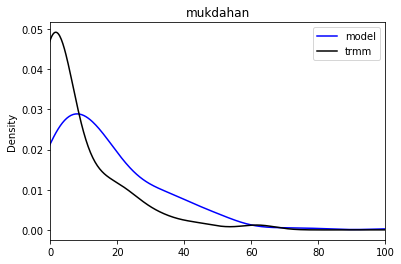

working on../parameterization_exp/wrfpost_run_25_2014_d01.nc ../parameterization_exp/wrfpost_run_12_2015_d01.nc


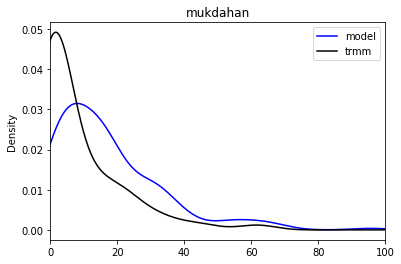

working on../parameterization_exp/wrfpost_run_26_2014_d01.nc ../parameterization_exp/wrfpost_run_13_2015_d01.nc


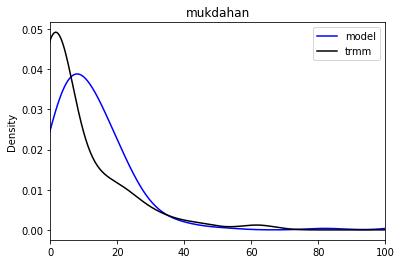

working on../parameterization_exp/wrfpost_run_28_2014_d01.nc ../parameterization_exp/wrfpost_run_27_2015_d01.nc


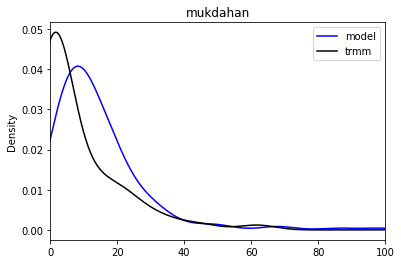

In [329]:
for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([184,la,lo])
    ppt[:92,:,:]=wrf2014.PPT
    ppt[92:,:,:]=wrf2015.PPT
    plotpdf(mukdahan_loc,ppt,wrf2014,'mukdahan')
    
    plt.show()

working on../parameterization_exp/wrfpost_run_14_2014_d01.nc ../parameterization_exp/wrfpost_run_01_2015_d01.nc


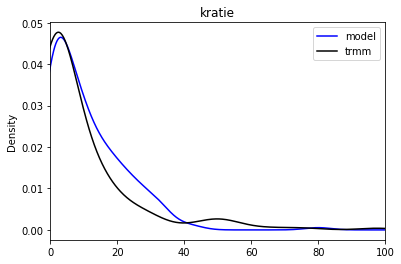

working on../parameterization_exp/wrfpost_run_15_2014_d01.nc ../parameterization_exp/wrfpost_run_02_2015_d01.nc


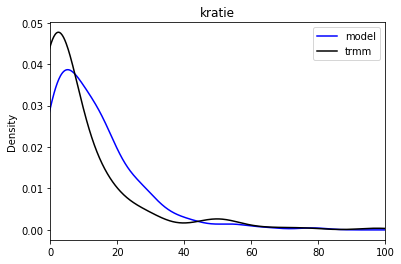

working on../parameterization_exp/wrfpost_run_16_2014_d01.nc ../parameterization_exp/wrfpost_run_03_2015_d01.nc


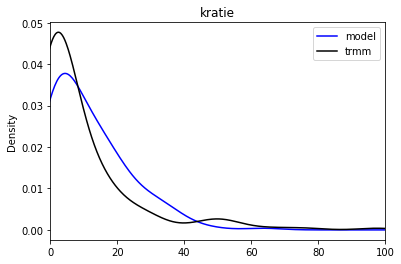

working on../parameterization_exp/wrfpost_run_17_2014_d01.nc ../parameterization_exp/wrfpost_run_04_2015_d01.nc


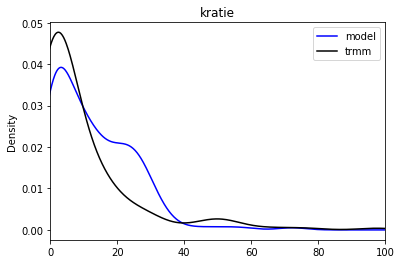

working on../parameterization_exp/wrfpost_run_18_2014_d01.nc ../parameterization_exp/wrfpost_run_05_2015_d01.nc


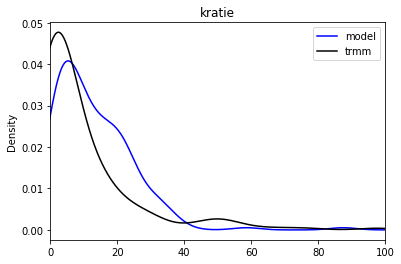

working on../parameterization_exp/wrfpost_run_19_2014_d01.nc ../parameterization_exp/wrfpost_run_06_2015_d01.nc


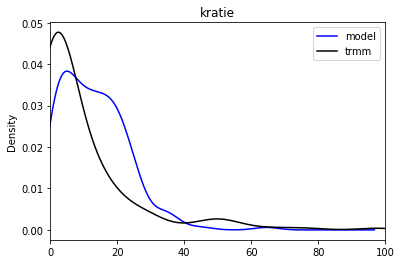

working on../parameterization_exp/wrfpost_run_20_2014_d01.nc ../parameterization_exp/wrfpost_run_07_2015_d01.nc


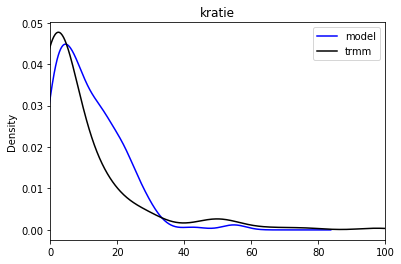

working on../parameterization_exp/wrfpost_run_21_2014_d01.nc ../parameterization_exp/wrfpost_run_08_2015_d01.nc


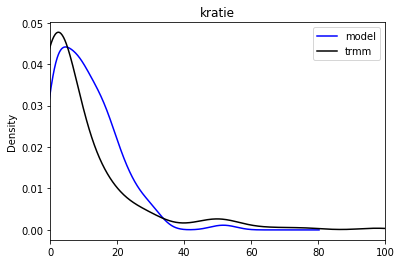

working on../parameterization_exp/wrfpost_run_22_2014_d01.nc ../parameterization_exp/wrfpost_run_09_2015_d01.nc


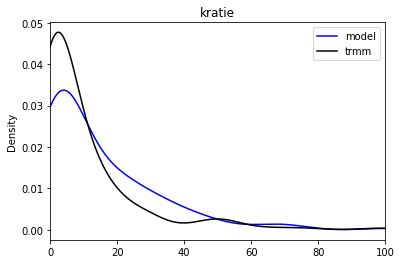

working on../parameterization_exp/wrfpost_run_23_2014_d01.nc ../parameterization_exp/wrfpost_run_10_2015_d01.nc


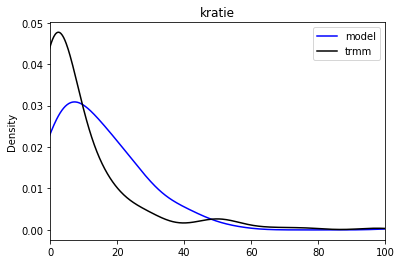

working on../parameterization_exp/wrfpost_run_24_2014_d01.nc ../parameterization_exp/wrfpost_run_11_2015_d01.nc


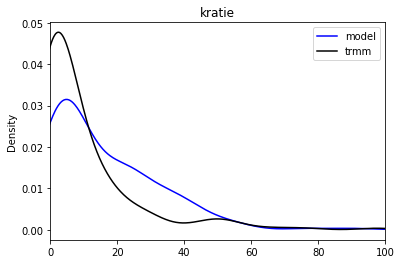

working on../parameterization_exp/wrfpost_run_25_2014_d01.nc ../parameterization_exp/wrfpost_run_12_2015_d01.nc


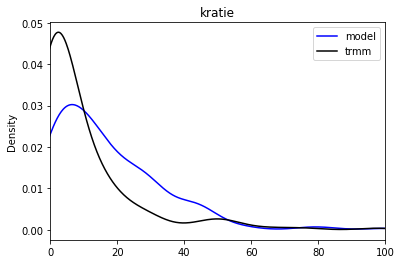

working on../parameterization_exp/wrfpost_run_26_2014_d01.nc ../parameterization_exp/wrfpost_run_13_2015_d01.nc


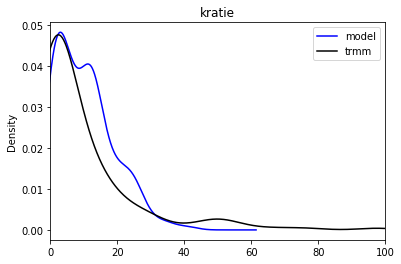

working on../parameterization_exp/wrfpost_run_28_2014_d01.nc ../parameterization_exp/wrfpost_run_27_2015_d01.nc


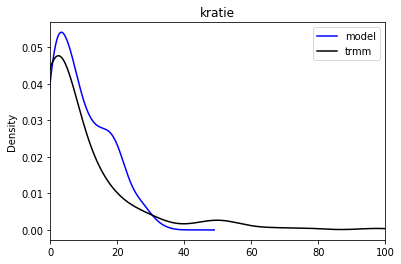

In [330]:
for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([184,la,lo])
    ppt[:92,:,:]=wrf2014.PPT
    ppt[92:,:,:]=wrf2015.PPT
    plotpdf(kratie_loc,ppt,wrf2014,'kratie')
    
    plt.show()

rearranging files
working on../parameterization_exp/wrfchem_outputs/wrfpost_par6_2014_d01.nc ../parameterization_exp/wrfchem_outputs/wrfpost_par2_2015_d01.nc
working on../parameterization_exp/wrfpost_run_25_2014_d01.nc ../parameterization_exp/wrfpost_run_12_2015_d01.nc


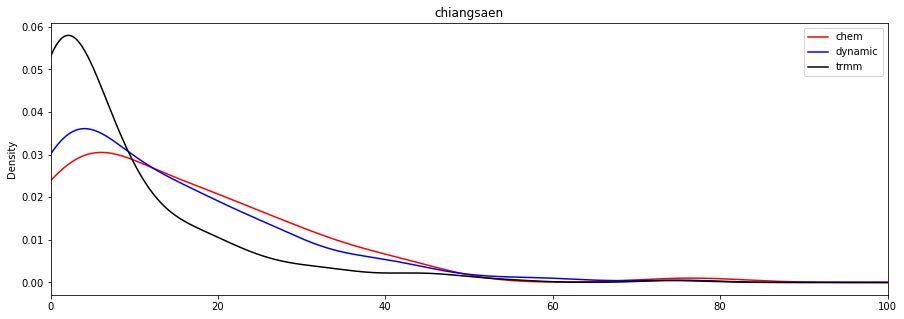

working on../parameterization_exp/wrfchem_outputs/wrfpost_par7_2014_d01.nc ../parameterization_exp/wrfchem_outputs/wrfpost_par3_2015_d01.nc
working on../parameterization_exp/wrfpost_run_21_2014_d01.nc ../parameterization_exp/wrfpost_run_08_2015_d01.nc


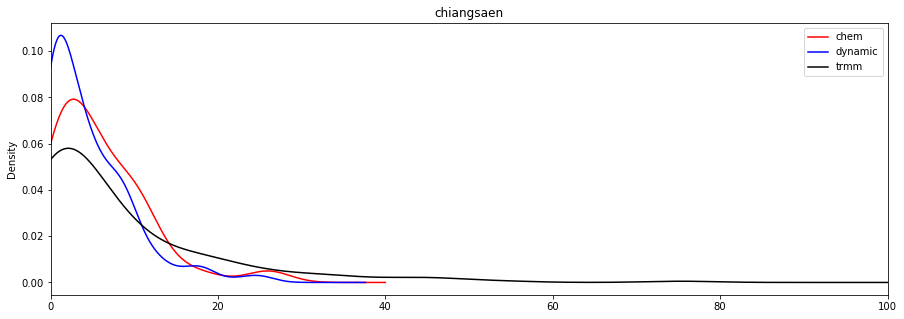

working on../parameterization_exp/wrfchem_outputs/wrfpost_par8_2014_d01.nc ../parameterization_exp/wrfchem_outputs/wrfpost_par4_2015_d01.nc
working on../parameterization_exp/wrfpost_run_18_2014_d01.nc ../parameterization_exp/wrfpost_run_05_2015_d01.nc


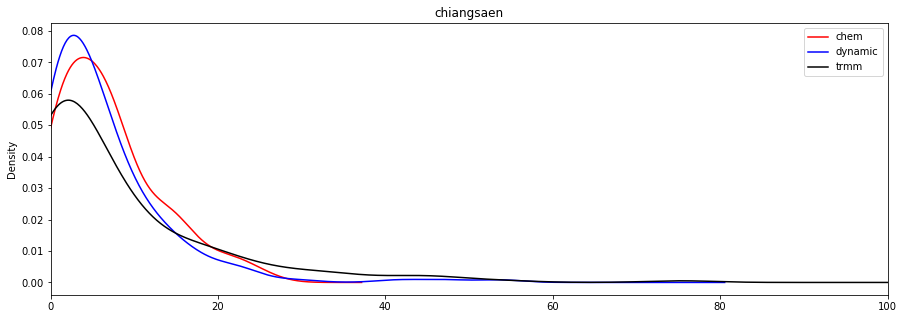

In [71]:
file_list2014c=[]
file_list2015c=[]
file_list2014c2=[]
file_list2015c2=[]
file_list2014dyn=[]
file_list2015dyn=[]
# for name in glob.glob('../parameterization_exp/wrfpost_par*d01.nc'):
#     file_list2014.append(name)
# for name in glob.glob('../parameterization_exp/wrfpost_par*d01.nc'):
#     file_list2015.append(name)
file_list2015c.append('../parameterization_exp/wrfchem_outputs/wrfpost_par2_2015_d01.nc')
file_list2015c.append('../parameterization_exp/wrfchem_outputs/wrfpost_par3_2015_d01.nc')
file_list2015c.append('../parameterization_exp/wrfchem_outputs/wrfpost_par4_2015_d01.nc')
file_list2014c.append('../parameterization_exp/wrfchem_outputs/wrfpost_par6_2014_d01.nc')
file_list2014c.append('../parameterization_exp/wrfchem_outputs/wrfpost_par7_2014_d01.nc')
file_list2014c.append('../parameterization_exp/wrfchem_outputs/wrfpost_par8_2014_d01.nc')
file_list2015dyn.append('../parameterization_exp/wrfpost_run_12_2015_d01.nc')
file_list2014dyn.append('../parameterization_exp/wrfpost_run_25_2014_d01.nc')
file_list2015dyn.append('../parameterization_exp/wrfpost_run_08_2015_d01.nc')
file_list2014dyn.append('../parameterization_exp/wrfpost_run_21_2014_d01.nc')
file_list2015dyn.append('../parameterization_exp/wrfpost_run_05_2015_d01.nc')
file_list2014dyn.append('../parameterization_exp/wrfpost_run_18_2014_d01.nc')
file_list2015c2.append('../parameterization_exp/wrfchem_outputs/wrfpost_par2_2015_d02.nc')
file_list2015c2.append('../parameterization_exp/wrfchem_outputs/wrfpost_par3_2015_d02.nc')
file_list2015c2.append('../parameterization_exp/wrfchem_outputs/wrfpost_par4_2015_d02.nc')
file_list2014c2.append('../parameterization_exp/wrfchem_outputs/wrfpost_par6_2014_d02.nc')
file_list2014c2.append('../parameterization_exp/wrfchem_outputs/wrfpost_par7_2014_d02.nc')
file_list2014c2.append('../parameterization_exp/wrfchem_outputs/wrfpost_par8_2014_d02.nc')

#rearrange files by number
print('rearranging files')
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

file_list2014c.sort(key=natural_keys)
file_list2015c.sort(key=natural_keys)

def plotpdf3(loc,data,data2,frame,title):
    ilat,ilon=pos(loc,frame)
    ilattrmm,ilontrmm=pos(loc,trmm14)
    valtrmm=pd.DataFrame(trmm[:,ilattrmm,ilontrmm],columns=(['trmm']))
    val=pd.DataFrame(data[:,ilat,ilon],columns=['chem'])
    val2=pd.DataFrame(data2[:,ilat,ilon],columns=['dynamic'])
    ax=val.plot.density(color='red')
    val2.plot.density(ax=ax,color='blue')
    valtrmm.plot.density(ax=ax,color='black')
    ax.set_xbound(lower=0,upper=100)
    ax.set_title(title)

#combine files
for fileIndex in range(0,len(file_list2014c)):
    print('working on'+file_list2014c[fileIndex],file_list2015c[fileIndex])
    print('working on'+file_list2014dyn[fileIndex],file_list2015dyn[fileIndex])
    wrf2014=xr.open_dataset(file_list2014c[fileIndex])
    wrf2015=xr.open_dataset(file_list2015c[fileIndex])
    wrf2014dyn=xr.open_dataset(file_list2014dyn[fileIndex])
    wrf2015dyn=xr.open_dataset(file_list2015dyn[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([62,la,lo])
    ppt[:31,:,:]=wrf2014.PPT
    ppt[31:,:,:]=wrf2015.PPT
    ppt2=np.zeros([184,la,lo])
    ppt2[:92,:,:]=wrf2014dyn.PPT
    ppt2[92:,:,:]=wrf2015dyn.PPT
    plotpdf3(chiangsaen_loc,ppt,ppt2,wrf2014,'chiangsaen')
    
    plt.show()

working on../parameterization_exp/wrfchem_outputs/wrfpost_par6_2014_d01.nc ../parameterization_exp/wrfchem_outputs/wrfpost_par2_2015_d01.nc
working on../parameterization_exp/wrfpost_run_25_2014_d01.nc ../parameterization_exp/wrfpost_run_12_2015_d01.nc


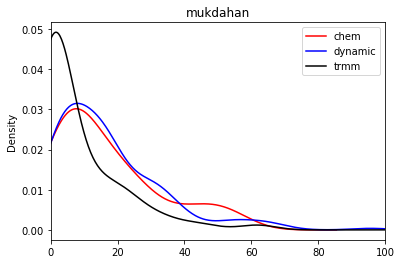

working on../parameterization_exp/wrfchem_outputs/wrfpost_par7_2014_d01.nc ../parameterization_exp/wrfchem_outputs/wrfpost_par3_2015_d01.nc
working on../parameterization_exp/wrfpost_run_21_2014_d01.nc ../parameterization_exp/wrfpost_run_08_2015_d01.nc


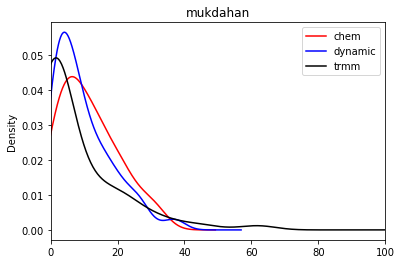

working on../parameterization_exp/wrfchem_outputs/wrfpost_par8_2014_d01.nc ../parameterization_exp/wrfchem_outputs/wrfpost_par4_2015_d01.nc
working on../parameterization_exp/wrfpost_run_18_2014_d01.nc ../parameterization_exp/wrfpost_run_05_2015_d01.nc


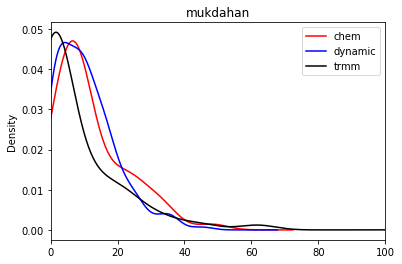

In [10]:
#combine files
for fileIndex in range(0,len(file_list2014c)):
    print('working on'+file_list2014c[fileIndex],file_list2015c[fileIndex])
    print('working on'+file_list2014dyn[fileIndex],file_list2015dyn[fileIndex])
    wrf2014=xr.open_dataset(file_list2014c[fileIndex])
    wrf2015=xr.open_dataset(file_list2015c[fileIndex])
    wrf2014dyn=xr.open_dataset(file_list2014dyn[fileIndex])
    wrf2015dyn=xr.open_dataset(file_list2015dyn[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([62,la,lo])
    ppt[:31,:,:]=wrf2014.PPT
    ppt[31:,:,:]=wrf2015.PPT
    ppt2=np.zeros([184,la,lo])
    ppt2[:92,:,:]=wrf2014dyn.PPT
    ppt2[92:,:,:]=wrf2015dyn.PPT
    plotpdf3(mukdahan_loc,ppt,ppt2,wrf2014,'mukdahan')
    
    plt.show()

working on../parameterization_exp/wrfchem_outputs/wrfpost_par6_2014_d01.nc ../parameterization_exp/wrfchem_outputs/wrfpost_par2_2015_d01.nc
working on../parameterization_exp/wrfpost_run_25_2014_d01.nc ../parameterization_exp/wrfpost_run_12_2015_d01.nc


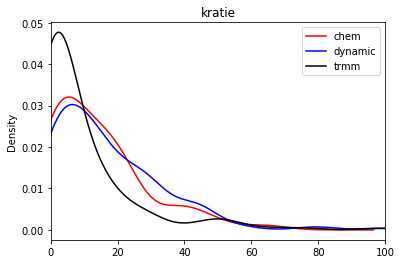

working on../parameterization_exp/wrfchem_outputs/wrfpost_par7_2014_d01.nc ../parameterization_exp/wrfchem_outputs/wrfpost_par3_2015_d01.nc
working on../parameterization_exp/wrfpost_run_21_2014_d01.nc ../parameterization_exp/wrfpost_run_08_2015_d01.nc


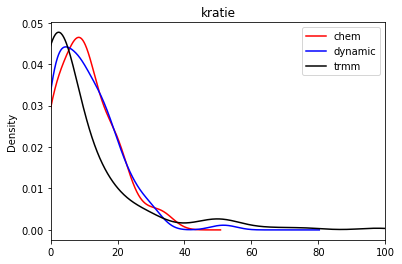

working on../parameterization_exp/wrfchem_outputs/wrfpost_par8_2014_d01.nc ../parameterization_exp/wrfchem_outputs/wrfpost_par4_2015_d01.nc
working on../parameterization_exp/wrfpost_run_18_2014_d01.nc ../parameterization_exp/wrfpost_run_05_2015_d01.nc


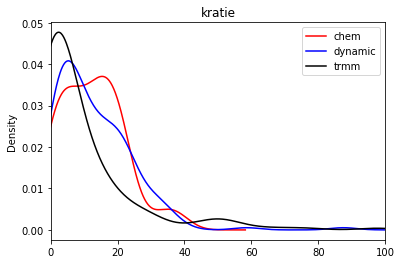

In [11]:
#combine files
for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014c[fileIndex],file_list2015c[fileIndex])
    print('working on'+file_list2014dyn[fileIndex],file_list2015dyn[fileIndex])
    wrf2014=xr.open_dataset(file_list2014c[fileIndex])
    wrf2015=xr.open_dataset(file_list2015c[fileIndex])
    wrf2014dyn=xr.open_dataset(file_list2014dyn[fileIndex])
    wrf2015dyn=xr.open_dataset(file_list2015dyn[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([62,la,lo])
    ppt[:31,:,:]=wrf2014.PPT
    ppt[31:,:,:]=wrf2015.PPT
    ppt2=np.zeros([184,la,lo])
    ppt2[:92,:,:]=wrf2014dyn.PPT
    ppt2[92:,:,:]=wrf2015dyn.PPT
    plotpdf3(kratie_loc,ppt,ppt2,wrf2014,'kratie')
    
    plt.show()

## plot spatial averages

rearranging files
working on../parameterization_exp/wrfpost_run_14_2014_d01.nc ../parameterization_exp/wrfpost_run_01_2015_d01.nc


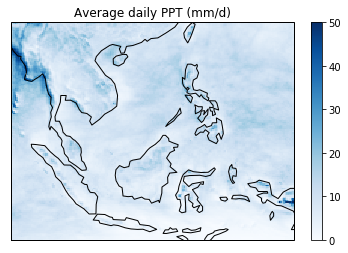

working on../parameterization_exp/wrfpost_run_15_2014_d01.nc ../parameterization_exp/wrfpost_run_02_2015_d01.nc


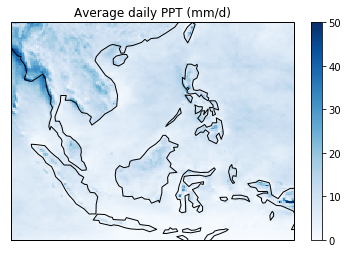

working on../parameterization_exp/wrfpost_run_16_2014_d01.nc ../parameterization_exp/wrfpost_run_03_2015_d01.nc


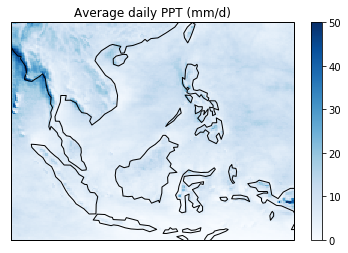

working on../parameterization_exp/wrfpost_run_17_2014_d01.nc ../parameterization_exp/wrfpost_run_04_2015_d01.nc


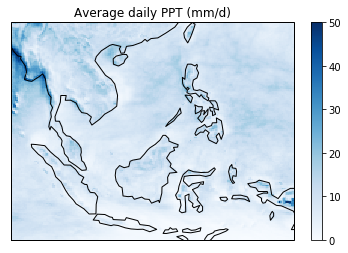

working on../parameterization_exp/wrfpost_run_18_2014_d01.nc ../parameterization_exp/wrfpost_run_05_2015_d01.nc


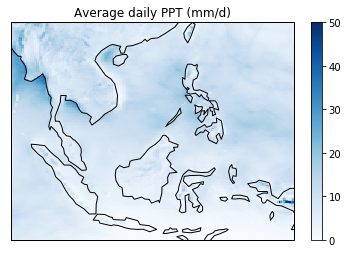

working on../parameterization_exp/wrfpost_run_19_2014_d01.nc ../parameterization_exp/wrfpost_run_06_2015_d01.nc


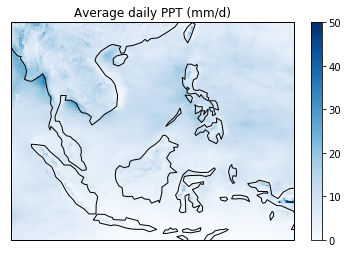

working on../parameterization_exp/wrfpost_run_20_2014_d01.nc ../parameterization_exp/wrfpost_run_07_2015_d01.nc


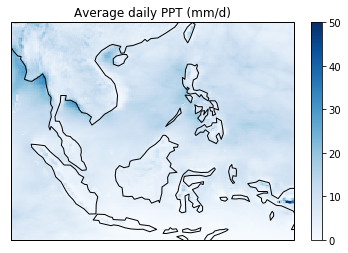

working on../parameterization_exp/wrfpost_run_21_2014_d01.nc ../parameterization_exp/wrfpost_run_08_2015_d01.nc


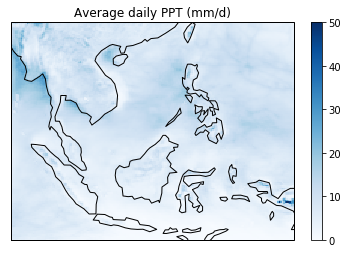

working on../parameterization_exp/wrfpost_run_22_2014_d01.nc ../parameterization_exp/wrfpost_run_09_2015_d01.nc


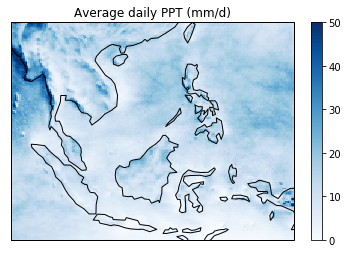

working on../parameterization_exp/wrfpost_run_23_2014_d01.nc ../parameterization_exp/wrfpost_run_10_2015_d01.nc


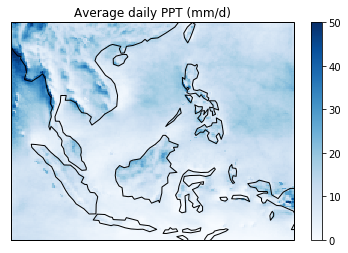

working on../parameterization_exp/wrfpost_run_24_2014_d01.nc ../parameterization_exp/wrfpost_run_11_2015_d01.nc


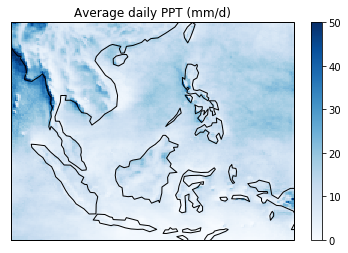

working on../parameterization_exp/wrfpost_run_25_2014_d01.nc ../parameterization_exp/wrfpost_run_12_2015_d01.nc


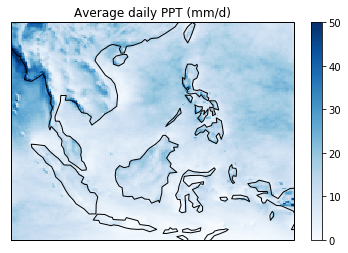

working on../parameterization_exp/wrfpost_run_26_2014_d01.nc ../parameterization_exp/wrfpost_run_13_2015_d01.nc


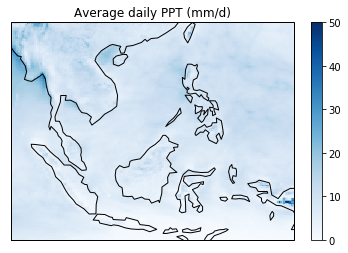

working on../parameterization_exp/wrfpost_run_28_2014_d01.nc ../parameterization_exp/wrfpost_run_27_2015_d01.nc


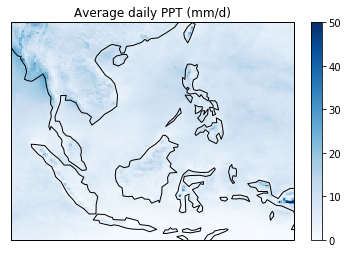

In [12]:
file_list2014=[]
file_list2015=[]
for name in glob.glob('../parameterization_exp/wrfpost_run*_2014_d01.nc'):
    file_list2014.append(name)
for name in glob.glob('../parameterization_exp/wrfpost_run*_2015_d01.nc'):
    file_list2015.append(name)

#rearrange files by number
print('rearranging files')
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

file_list2014.sort(key=natural_keys)
file_list2015.sort(key=natural_keys)

#combine files
for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([184,la,lo])
    ppt[:92,:,:]=wrf2014.PPT
    ppt[92:,:,:]=wrf2015.PPT
    cmap='Blues'
    vminn=0
    vmaxx=50
    ax1=plt.subplot(projection=ccrs.PlateCarree())
    ax1.pcolor(wrf2014.lon,wrf2014.lat,np.mean(ppt,axis=0),vmin=vminn,vmax=vmaxx,cmap=cmap)
    ax1.coastlines()
    ax1.set_title('Average daily PPT (mm/d)')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=vminn, vmax=vmaxx))
    sm._A = []
    plt.colorbar(sm,ax=ax1,fraction=0.04, pad=0.05)
    
    plt.show()

rearranging files
working on../parameterization_exp/wrfpost_run_14_2014_d02.nc ../parameterization_exp/wrfpost_run_01_2015_d02.nc


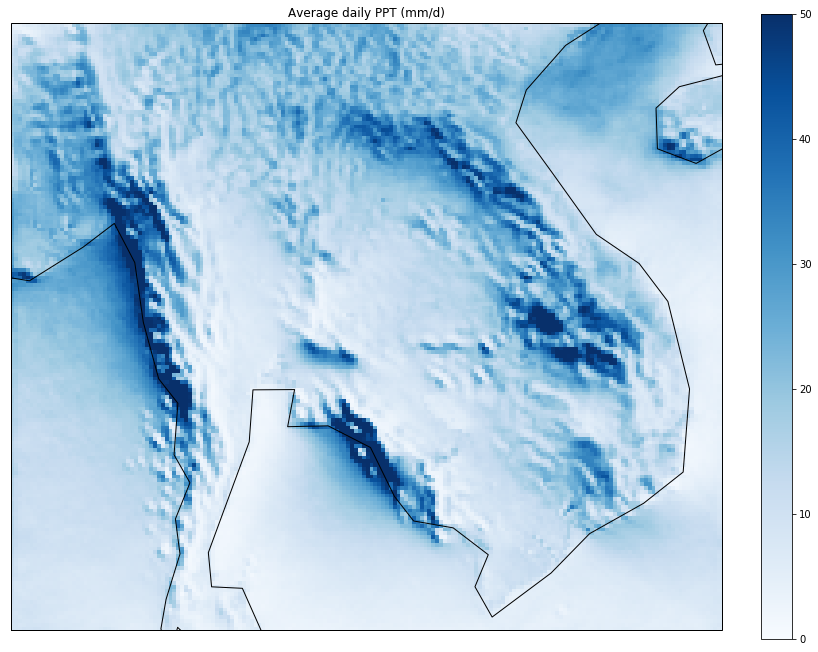

working on../parameterization_exp/wrfpost_run_15_2014_d02.nc ../parameterization_exp/wrfpost_run_02_2015_d02.nc


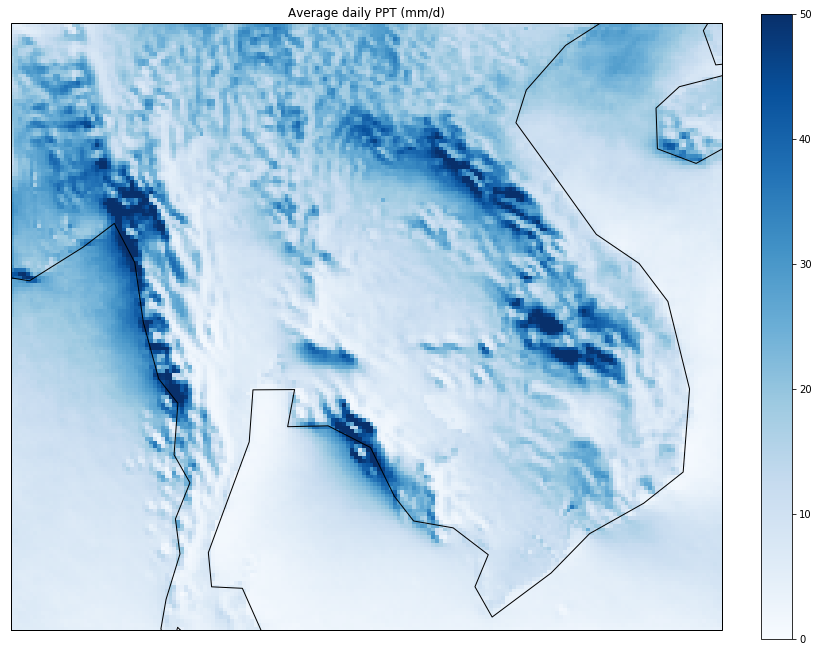

working on../parameterization_exp/wrfpost_run_16_2014_d02.nc ../parameterization_exp/wrfpost_run_03_2015_d02.nc


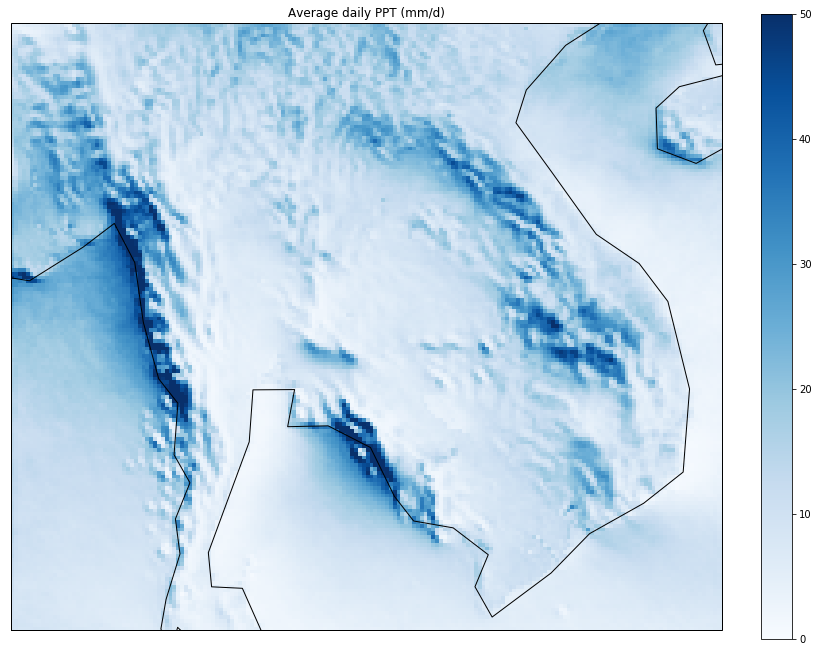

working on../parameterization_exp/wrfpost_run_17_2014_d02.nc ../parameterization_exp/wrfpost_run_04_2015_d02.nc


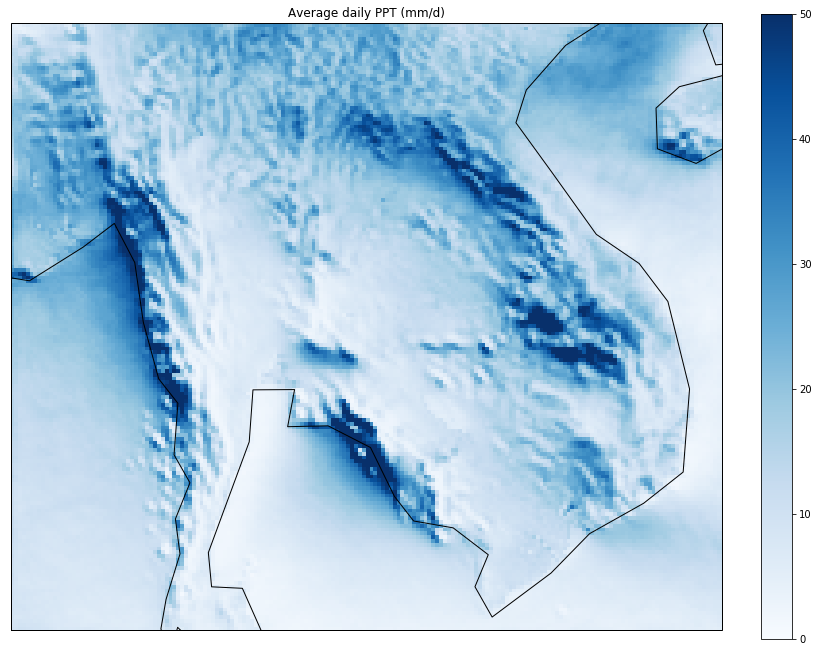

working on../parameterization_exp/wrfpost_run_18_2014_d02.nc ../parameterization_exp/wrfpost_run_05_2015_d02.nc


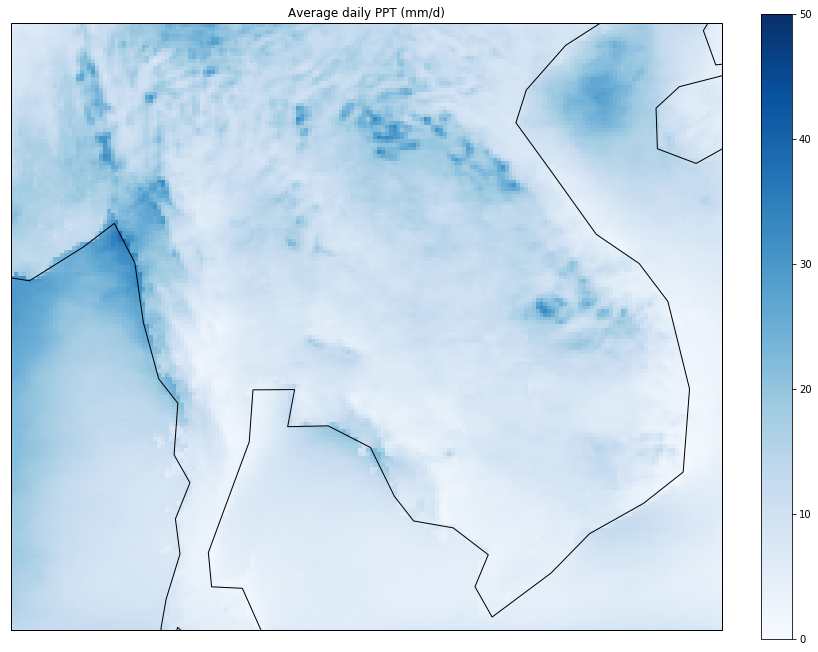

working on../parameterization_exp/wrfpost_run_19_2014_d02.nc ../parameterization_exp/wrfpost_run_06_2015_d02.nc


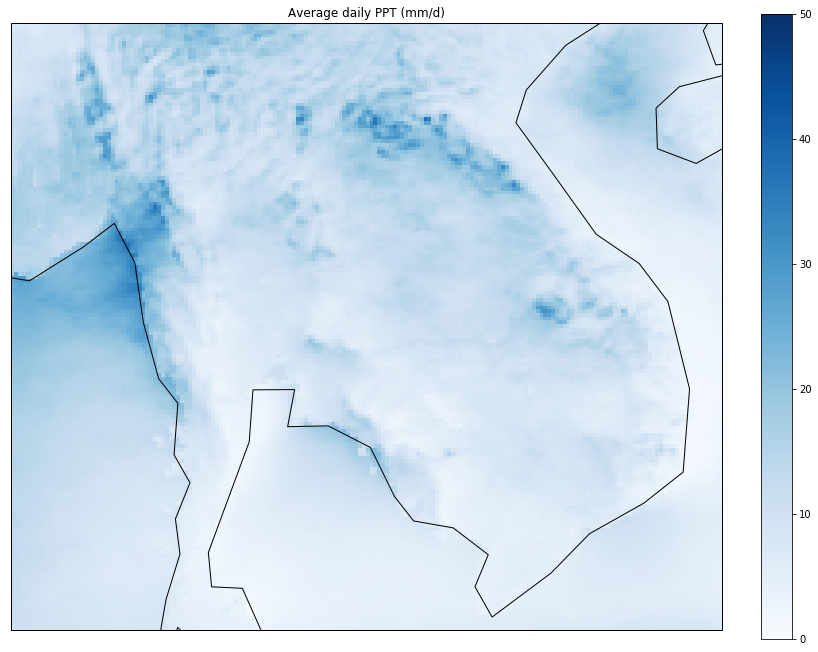

working on../parameterization_exp/wrfpost_run_20_2014_d02.nc ../parameterization_exp/wrfpost_run_07_2015_d02.nc


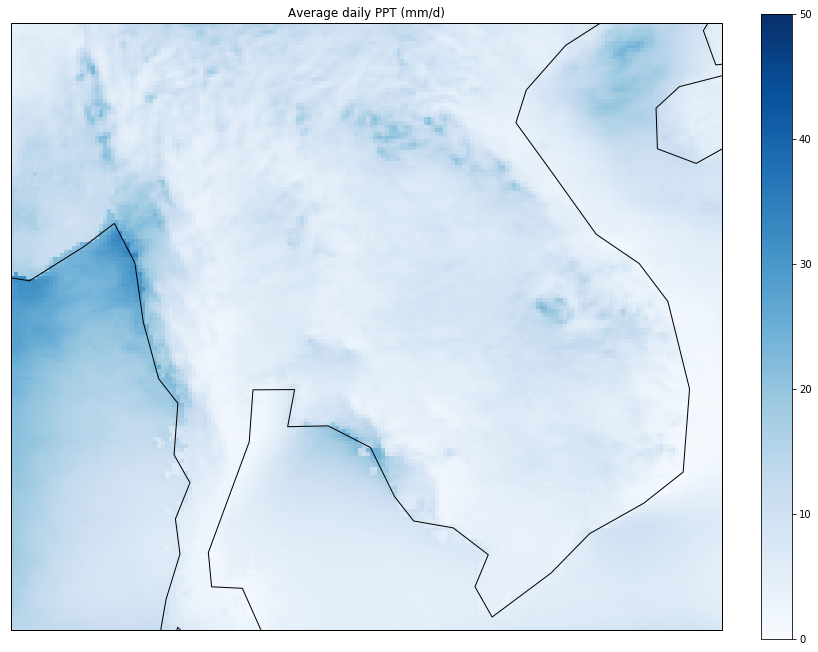

working on../parameterization_exp/wrfpost_run_21_2014_d02.nc ../parameterization_exp/wrfpost_run_08_2015_d02.nc


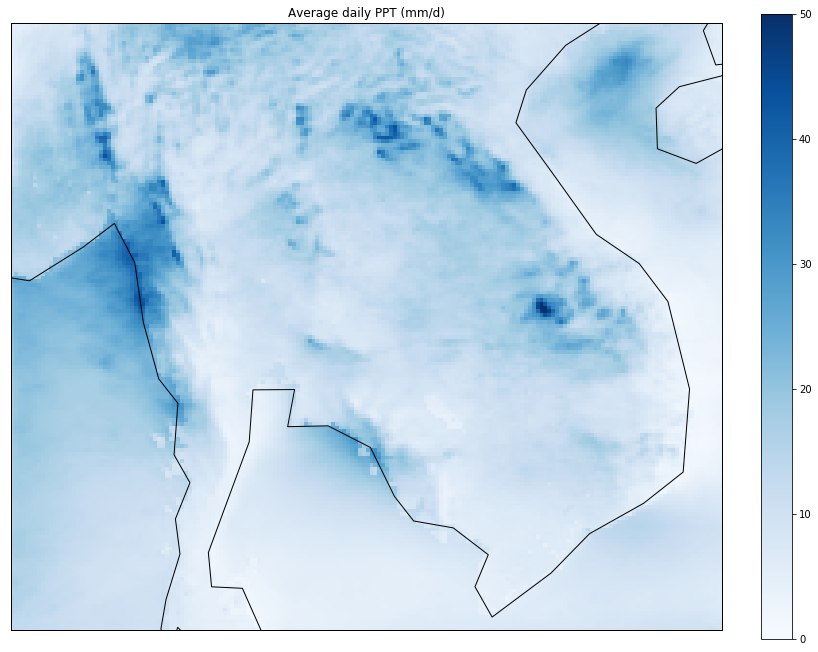

working on../parameterization_exp/wrfpost_run_22_2014_d02.nc ../parameterization_exp/wrfpost_run_09_2015_d02.nc


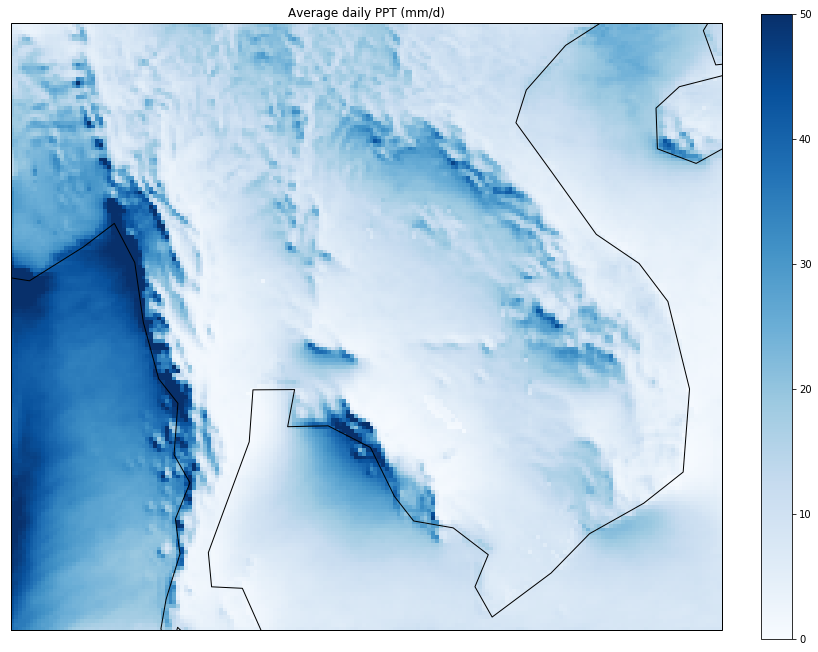

working on../parameterization_exp/wrfpost_run_23_2014_d02.nc ../parameterization_exp/wrfpost_run_10_2015_d02.nc


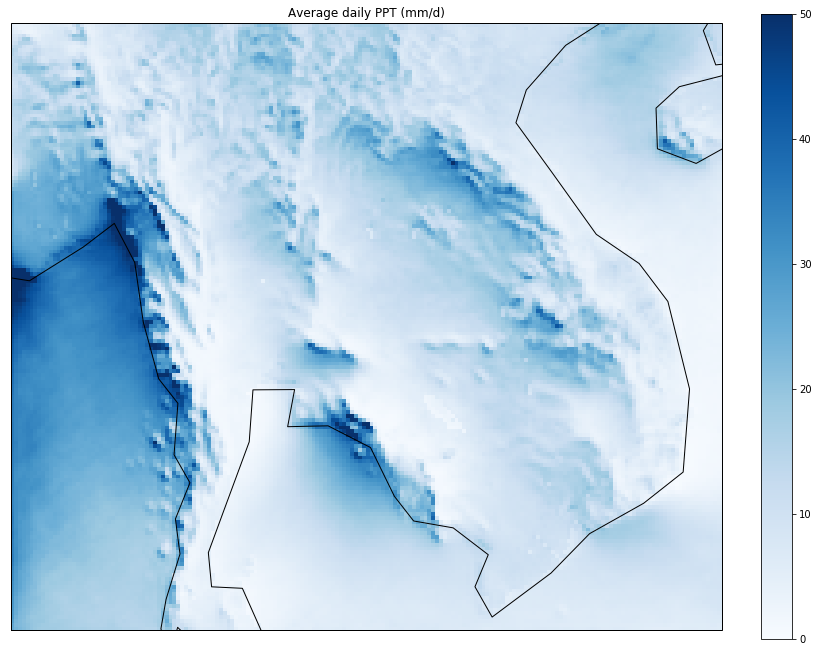

working on../parameterization_exp/wrfpost_run_24_2014_d02.nc ../parameterization_exp/wrfpost_run_11_2015_d02.nc


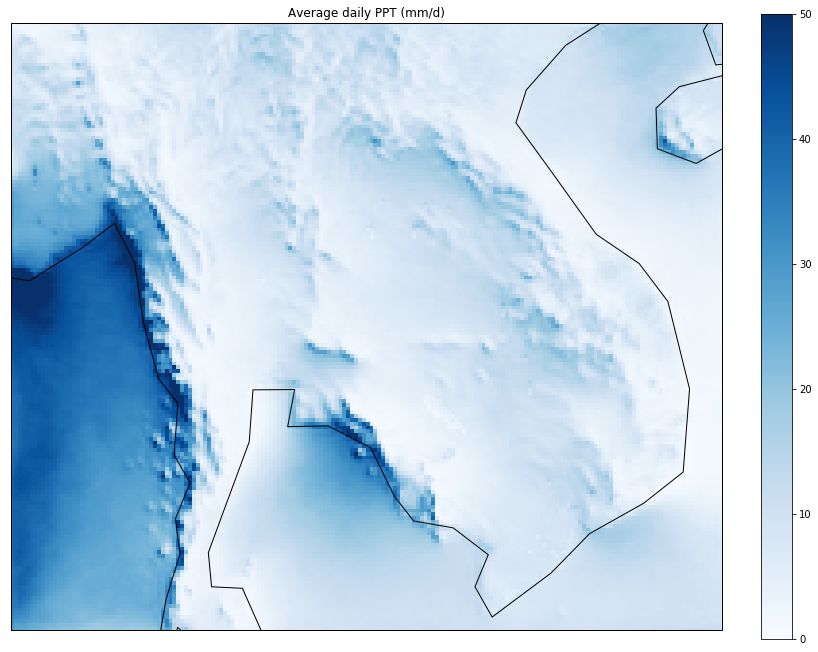

working on../parameterization_exp/wrfpost_run_25_2014_d02.nc ../parameterization_exp/wrfpost_run_12_2015_d02.nc


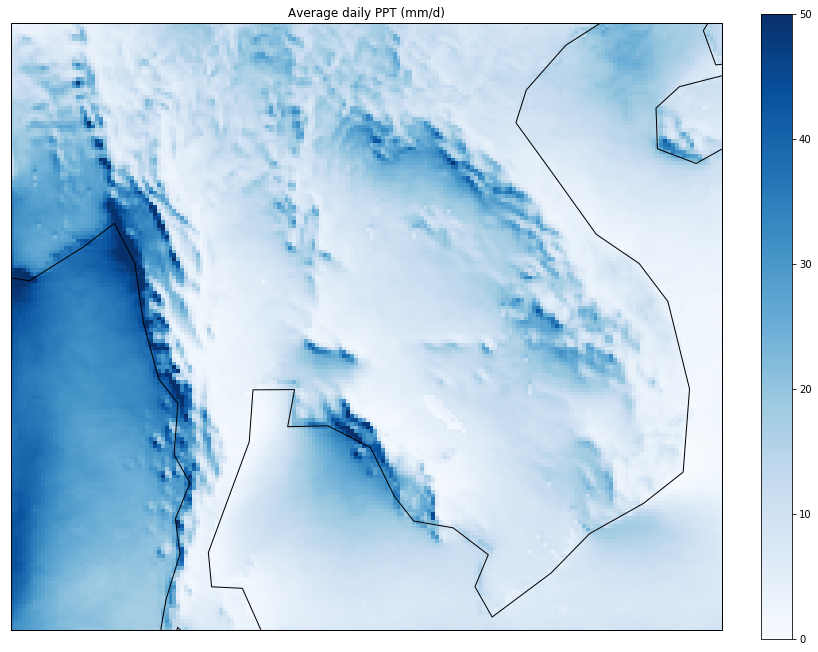

working on../parameterization_exp/wrfpost_run_26_2014_d02.nc ../parameterization_exp/wrfpost_run_13_2015_d02.nc


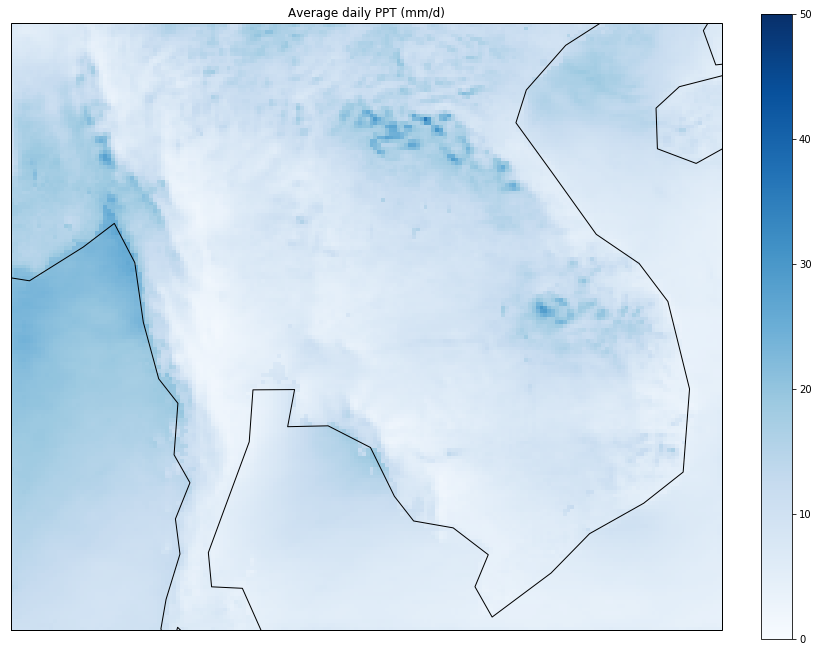

working on../parameterization_exp/wrfpost_run_28_2014_d02.nc ../parameterization_exp/wrfpost_run_27_2015_d02.nc


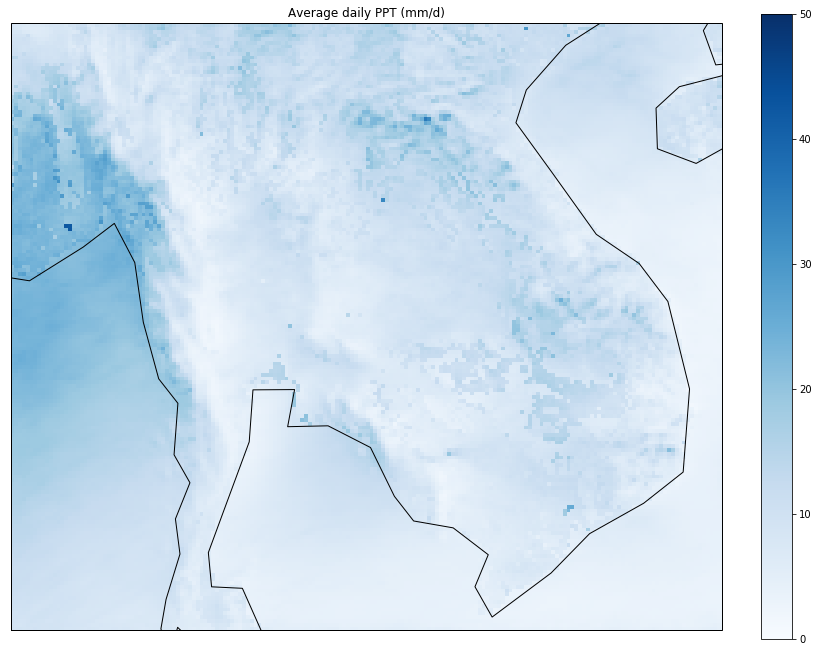

In [45]:
file_list2014d02=[]
file_list2015d02=[]
for name in glob.glob('../parameterization_exp/wrfpost_run*_2014_d02.nc'):
    file_list2014d02.append(name)
for name in glob.glob('../parameterization_exp/wrfpost_run*_2015_d02.nc'):
    file_list2015d02.append(name)

#rearrange files by number
print('rearranging files')
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

file_list2014d02.sort(key=natural_keys)
file_list2015d02.sort(key=natural_keys)
plt.rcParams["figure.figsize"] = 6,6
#combine files
for fileIndex in range(0,len(file_list2014d02)):
    print('working on'+file_list2014d02[fileIndex],file_list2015d02[fileIndex])
    wrf2014=xr.open_dataset(file_list2014d02[fileIndex])
    wrf2015=xr.open_dataset(file_list2015d02[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([184,la,lo])
    ppt[:92,:,:]=wrf2014.PPT
    ppt[92:,:,:]=wrf2015.PPT
    cmap='Blues'
    vminn=0
    vmaxx=50
    ax1=plt.subplot(projection=ccrs.PlateCarree())
    ax1.pcolor(wrf2014.lon,wrf2014.lat,np.mean(ppt,axis=0),vmin=vminn,vmax=vmaxx,cmap=cmap)
    ax1.coastlines()
    ax1.set_title('Average daily PPT (mm/d)')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=vminn, vmax=vmaxx))
    sm._A = []
    plt.colorbar(sm,ax=ax1,fraction=0.04, pad=0.05)
    
    plt.show()

## box plots

In [33]:
def plotbox(loc,data,frame,title):
    ilat,ilon=pos(loc,frame)
    ilattrmm,ilontrmm=pos(loc,trmm14)
    valtrmm=pd.DataFrame(trmm[:,ilattrmm,ilontrmm],columns=(['trmm']))
    val=pd.DataFrame(data[:,ilat,ilon],columns=['model'])
#     ax=plt.boxplot(val['model'])
    return data[:,ilat,ilon]
#     ax.set_title(title)
    
plotbox(chiangsaen_loc,trmm,trmm14,'chiangsaen')
plt.show()

In [77]:
def get_everything(file_list2014,file_list2015,chem=False,trmm=trmm):
    if chem:
        trmm=trmmc
    frame=xr.open_dataset(file_list2014[0])
    ti,la,lo=np.shape(frame.PPT)
    ti2=ti*2
    everything_chiangsaen=np.empty([len(file_list2014)+1,ti2])
    everything_mukdahan=np.empty([len(file_list2014)+1,ti2])
    everything_kratie=np.empty([len(file_list2014)+1,ti2])
    for fileIndex in range(0,len(file_list2014)):
        print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
        wrf2014=xr.open_dataset(file_list2014[fileIndex])
        wrf2015=xr.open_dataset(file_list2015[fileIndex])
        ppt=np.zeros([ti2,la,lo])
        ppt[:ti,:,:]=wrf2014.PPT
        ppt[ti:,:,:]=wrf2015.PPT
        everything_chiangsaen[fileIndex,:]=plotbox(chiangsaen_loc,ppt,wrf2014,'chiangsaen')
        everything_mukdahan[fileIndex,:]=plotbox(mukdahan_loc,ppt,wrf2014,'mukdahan')
        everything_kratie[fileIndex,:]=plotbox(kratie_loc,ppt,wrf2014,'kratie')
    ilattrmm,ilontrmm=pos(chiangsaen_loc,trmm14)
    everything_chiangsaen[-1,:]=trmm[:,ilattrmm,ilontrmm]
    ilattrmm,ilontrmm=pos(mukdahan_loc,trmm14)
    everything_mukdahan[-1,:]=trmm[:,ilattrmm,ilontrmm]
    ilattrmm,ilontrmm=pos(kratie_loc,trmm14)
    everything_kratie[-1,:]=trmm[:,ilattrmm,ilontrmm]
    return everything_chiangsaen, everything_mukdahan, everything_kratie

everything_chiangsaen, everything_mukdahan, everything_kratie = get_everything(file_list2014,file_list2015)
everything_chiangsaen_d02, everything_mukdahan_d02, everything_kratie_d02 = get_everything(file_list2014d02,file_list2015d02)

working on../parameterization_exp/wrfpost_run_14_2014_d01.nc ../parameterization_exp/wrfpost_run_01_2015_d01.nc
working on../parameterization_exp/wrfpost_run_15_2014_d01.nc ../parameterization_exp/wrfpost_run_02_2015_d01.nc
working on../parameterization_exp/wrfpost_run_16_2014_d01.nc ../parameterization_exp/wrfpost_run_03_2015_d01.nc
working on../parameterization_exp/wrfpost_run_17_2014_d01.nc ../parameterization_exp/wrfpost_run_04_2015_d01.nc
working on../parameterization_exp/wrfpost_run_18_2014_d01.nc ../parameterization_exp/wrfpost_run_05_2015_d01.nc
working on../parameterization_exp/wrfpost_run_19_2014_d01.nc ../parameterization_exp/wrfpost_run_06_2015_d01.nc
working on../parameterization_exp/wrfpost_run_20_2014_d01.nc ../parameterization_exp/wrfpost_run_07_2015_d01.nc
working on../parameterization_exp/wrfpost_run_21_2014_d01.nc ../parameterization_exp/wrfpost_run_08_2015_d01.nc
working on../parameterization_exp/wrfpost_run_22_2014_d01.nc ../parameterization_exp/wrfpost_run_09_2015

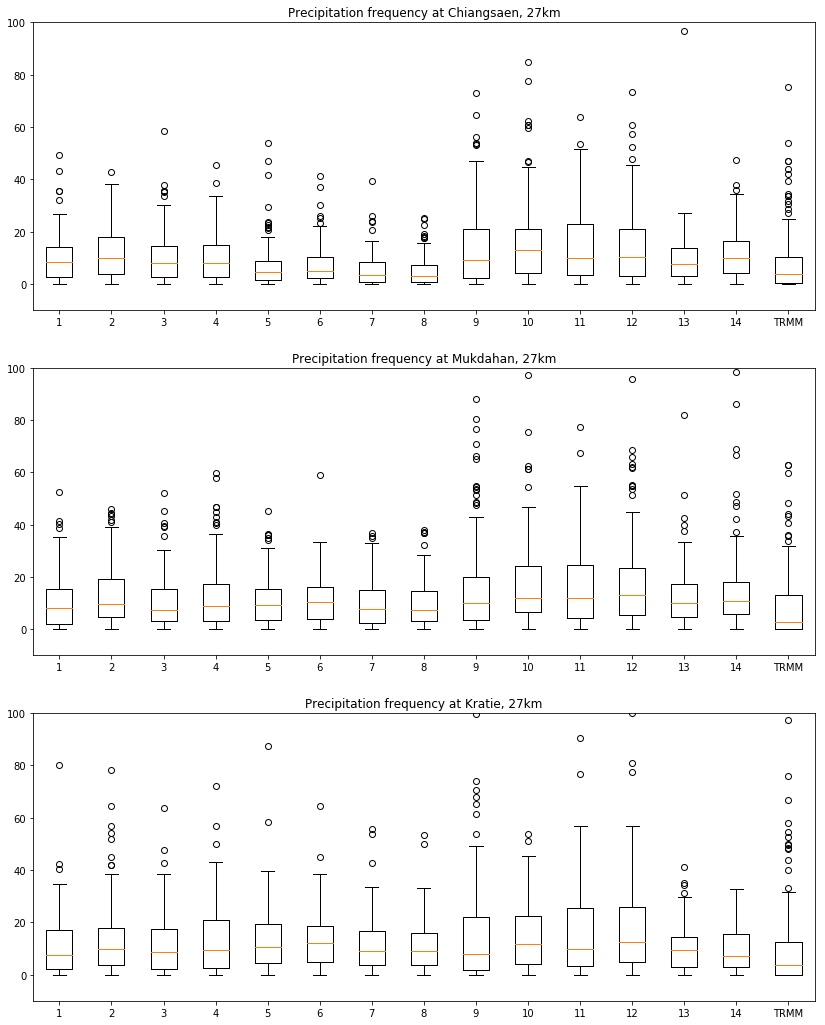

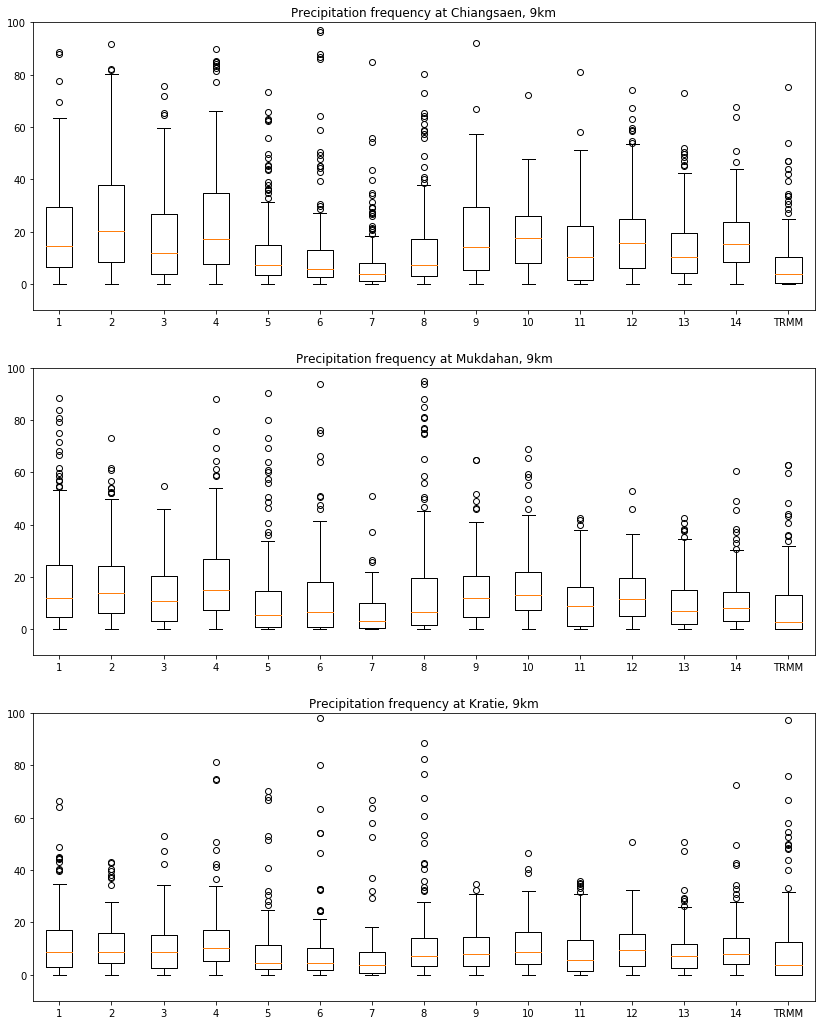

In [78]:
plt.rcParams["figure.figsize"] = 14,18
def boxplot(everything_chiangsaen,everything_mukdahan,everything_kratie,res,chem=False):
    ymin=-10
    ymax=100
    if chem:
        plt.subplot(1,3,1)
    else:
        plt.subplot(3,1,1)
    plt.boxplot(everything_chiangsaen.T)
    plt.ylim( (ymin, ymax) )
    ax=plt.gca()
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[-1] = 'TRMM'
    ax.set_xticklabels(labels)
    plt.title('Precipitation frequency at Chiangsaen, '+res+'km')
    if chem:
        plt.subplot(1,3,2)
    else:
        plt.subplot(3,1,2)
    plt.boxplot(everything_mukdahan.T)
    plt.ylim( (ymin, ymax) )
    ax=plt.gca()
    ax.set_xticklabels(labels)
    plt.title('Precipitation frequency at Mukdahan, '+res+'km')
    if chem:
        plt.subplot(1,3,3)
    else:
        plt.subplot(3,1,3)
    plt.boxplot(everything_kratie.T)
    plt.ylim( (ymin, ymax) )
    ax=plt.gca()
    ax.set_xticklabels(labels)
    plt.title('Precipitation frequency at Kratie, '+res+'km')

plt.figure(1)
boxplot(everything_chiangsaen,everything_mukdahan,everything_kratie,'27')
plt.figure(2)
boxplot(everything_chiangsaen_d02,everything_mukdahan_d02,everything_kratie_d02,'9')
plt.show()

working on../parameterization_exp/wrfchem_outputs/wrfpost_par6_2014_d01.nc ../parameterization_exp/wrfchem_outputs/wrfpost_par2_2015_d01.nc
working on../parameterization_exp/wrfchem_outputs/wrfpost_par7_2014_d01.nc ../parameterization_exp/wrfchem_outputs/wrfpost_par3_2015_d01.nc
working on../parameterization_exp/wrfchem_outputs/wrfpost_par8_2014_d01.nc ../parameterization_exp/wrfchem_outputs/wrfpost_par4_2015_d01.nc
working on../parameterization_exp/wrfchem_outputs/wrfpost_par6_2014_d02.nc ../parameterization_exp/wrfchem_outputs/wrfpost_par2_2015_d02.nc
working on../parameterization_exp/wrfchem_outputs/wrfpost_par7_2014_d02.nc ../parameterization_exp/wrfchem_outputs/wrfpost_par3_2015_d02.nc
working on../parameterization_exp/wrfchem_outputs/wrfpost_par8_2014_d02.nc ../parameterization_exp/wrfchem_outputs/wrfpost_par4_2015_d02.nc


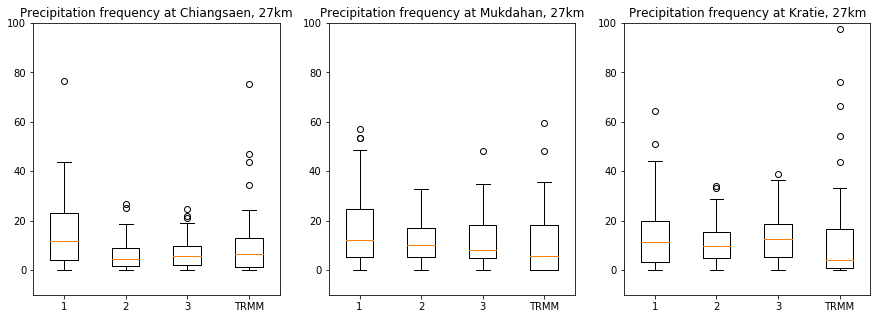

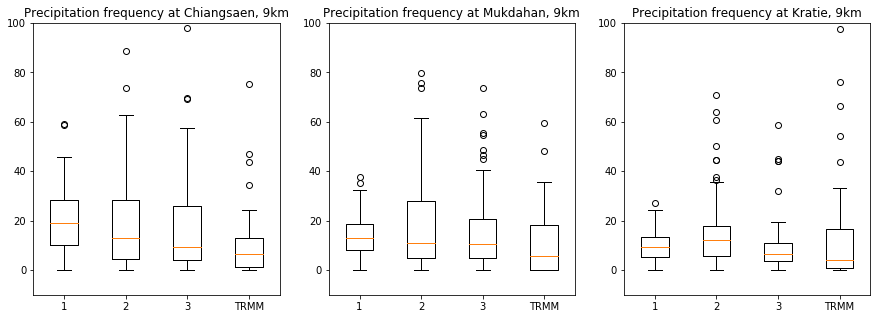

In [79]:
#for chem results
everything_chiangsaen, everything_mukdahan, everything_kratie = get_everything(file_list2014c,file_list2015c,chem=True)
plt.rcParams["figure.figsize"] = 15,5
plt.figure(1)
boxplot(everything_chiangsaen,everything_mukdahan,everything_kratie,'27',chem=True)
everything_chiangsaen, everything_mukdahan, everything_kratie = get_everything(file_list2014c2,file_list2015c2,chem=True)
plt.figure(2)
boxplot(everything_chiangsaen,everything_mukdahan,everything_kratie,'9',chem=True)
plt.show()

In [21]:
print(wrf2014.time)

<xarray.DataArray 'time' (time: 31)>
array(['2014-07-01T00:00:00.000000000', '2014-07-02T00:00:00.000000000',
       '2014-07-03T00:00:00.000000000', '2014-07-04T00:00:00.000000000',
       '2014-07-05T00:00:00.000000000', '2014-07-06T00:00:00.000000000',
       '2014-07-07T00:00:00.000000000', '2014-07-08T00:00:00.000000000',
       '2014-07-09T00:00:00.000000000', '2014-07-10T00:00:00.000000000',
       '2014-07-11T00:00:00.000000000', '2014-07-12T00:00:00.000000000',
       '2014-07-13T00:00:00.000000000', '2014-07-14T00:00:00.000000000',
       '2014-07-15T00:00:00.000000000', '2014-07-16T00:00:00.000000000',
       '2014-07-17T00:00:00.000000000', '2014-07-18T00:00:00.000000000',
       '2014-07-19T00:00:00.000000000', '2014-07-20T00:00:00.000000000',
       '2014-07-21T00:00:00.000000000', '2014-07-22T00:00:00.000000000',
       '2014-07-23T00:00:00.000000000', '2014-07-24T00:00:00.000000000',
       '2014-07-25T00:00:00.000000000', '2014-07-26T00:00:00.000000000',
       '2014-0

## Spatial average for TRMM DATA

rearranging files
working on../parameterization_exp/trmm_2014_JunAug.nc ../parameterization_exp/trmm_2015_JunAug.nc


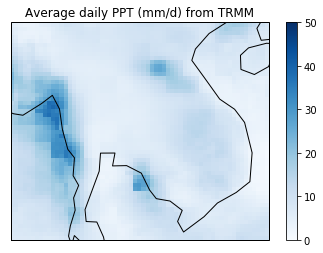

working on../parameterization_exp/trmm_2014big_JunAug.nc ../parameterization_exp/trmm_2015big_JunAug.nc


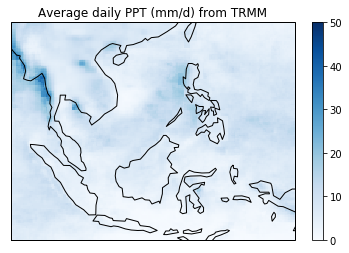

In [2]:
file_list2014=[]
file_list2015=[]
for name in glob.glob('../parameterization_exp/trmm_2014*'):
    file_list2014.append(name)
for name in glob.glob('../parameterization_exp/trmm_2015*'):
    file_list2015.append(name)

#rearrange files by number
print('rearranging files')
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

file_list2014.sort(key=natural_keys)
file_list2015.sort(key=natural_keys)

#combine files
for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    ti,la,lo=np.shape(wrf2014.PPT)
    ppt=np.zeros([184,la,lo])
    ppt[:92,:,:]=wrf2014.PPT
    ppt[92:,:,:]=wrf2015.PPT
    cmap='Blues'
    vminn=0
    vmaxx=50
    ax1=plt.subplot(projection=ccrs.PlateCarree())
    ax1.pcolor(wrf2014.lon,wrf2014.lat,np.mean(ppt,axis=0),vmin=vminn,vmax=vmaxx,cmap=cmap)
    ax1.coastlines()
    ax1.set_title('Average daily PPT (mm/d) from TRMM')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=vminn, vmax=vmaxx))
    sm._A = []
    plt.colorbar(sm,ax=ax1,fraction=0.04, pad=0.05)
    
    plt.show()